## Shopify Problem

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. 

Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

* What metric would you report for this dataset?

* What is its value?


In [2]:
# Import the reguired libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Justi\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# open the csv file and look at the data
path = Path("Data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# Ready data frame
df = pd.read_csv(path, infer_datetime_format=True, parse_dates=True)

# Set created_at column as datetime type
df["created_at"] = pd.to_datetime(df["created_at"])

# Sort by date
df.sort_values("created_at", inplace=True)

# Set the index
df.set_index("created_at", inplace=True)
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-01 00:08:09,1863,39,738,536,4,cash
2017-03-01 00:10:19,1742,39,910,268,2,cash
2017-03-01 00:14:12,3229,97,912,324,2,cash
2017-03-01 00:19:31,1268,80,798,290,2,credit_card
2017-03-01 00:22:25,2690,49,799,258,2,credit_card


In [4]:
# obtain general information with the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2017-03-01 00:08:09 to 2017-03-30 23:55:35
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
dtypes: int64(5), object(1)
memory usage: 273.4+ KB


* There seems to be no null values in the dataframe and the data types seems to be in order.

In [5]:
# Obtain the general statistics for the dataframe
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


* It looks like the value they got for the AOV was derived from the mean value of order_amount. Which tells me they did not use a rolling 30 day window for this.
* The total items seem to be high as well. It states above that each order had about 8.7 pair of shoes in each order. This seems high for shoe orders. 

In [6]:
# Look at the value counts for the total items to better understand how many items were in each order
df["total_items"].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

* Looking at the vaue counts give us a better picture of why the mean total items were so high. There seems to be an outlier with 17 orders that had 2000 items in each order which is causing this average to be so high.

In [7]:
# After looking at the dataframe it seems this user is swaying the calculations
# filter to just the 2000 total item rows
df[df["total_items"]==2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-02 04:00:00,4647,42,607,704000,2000,credit_card
2017-03-02 04:00:00,521,42,607,704000,2000,credit_card
2017-03-04 04:00:00,61,42,607,704000,2000,credit_card
2017-03-07 04:00:00,2298,42,607,704000,2000,credit_card
2017-03-07 04:00:00,16,42,607,704000,2000,credit_card
2017-03-11 04:00:00,1437,42,607,704000,2000,credit_card
2017-03-12 04:00:00,2154,42,607,704000,2000,credit_card
2017-03-15 04:00:00,1363,42,607,704000,2000,credit_card
2017-03-17 04:00:00,1603,42,607,704000,2000,credit_card


* When we filter to just 2000 items we can see that they are making the same purhcase of items and it is the same amount
* We can infer that this might be a whole saler who is purchasing inventory for there store or maybe just a system erroe at store 42
* This is most likely the reason why the AOV is higher than they realized. 
* Lets find the AOV with this user out of the picture

In [8]:
# create a new_df that excludes the purchases for total_items == 2000
new_df = df[df["order_amount"]<2000]
new_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-01 00:08:09,1863,39,738,536,4,cash
2017-03-01 00:10:19,1742,39,910,268,2,cash
2017-03-01 00:14:12,3229,97,912,324,2,cash
2017-03-01 00:19:31,1268,80,798,290,2,credit_card
2017-03-01 00:22:25,2690,49,799,258,2,credit_card


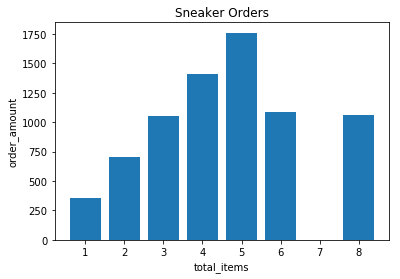

In [10]:
# Create a bar chart for the new_df to show which 
plt.bar(new_df["total_items"], new_df["order_amount"])
plt.xlabel("total_items")
plt.ylabel("order_amount")
plt.title("Sneaker Orders")
plt.show()

* In order for us to make a accurate calculation on the AOV we will need to group the order_amount and total_items by date. This is because there are multiple transactions in a given day and this will help simplify our calculation

In [11]:
# group order_amount and total_items by created_at
daily_df = new_df[["order_amount", "total_items"]].groupby([pd.Grouper(freq="D")]).sum()
daily_df.head()

,order_amount,total_items
created_at,,
2017-03-01,54704,357
2017-03-02,51484,346
2017-03-03,48729,324
2017-03-04,48604,309
2017-03-05,49118,317


In [12]:
# We need to get the simple moving average of the daily data frame or the 30 day moving average in this case
df_30_day_rolloing = daily_df.rolling(window=30).mean().dropna()
display(df_30_day_rolloing)
# Display in the last rows of the dataframe the 30 day rolling average for both
last_30_days_AOV = round(df_30_day_rolloing.iloc[-1]['order_amount'],2)
print(f"30 Day AOV: ${last_30_days_AOV}")

,order_amount,total_items
created_at,,
2017-03-30,49794.666667,328.266667


30 Day AOV: $49794.67


Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
* The above analysis and calculations show what was wrong with the previous calculation and then what would be the best way to evaluate the data

What metric would you report for this dataset?
* The best metric to use is the simple moving average. When it mentioned a 30 day window that told me it is a 30 day moving average.

What is its value?
The value is $49,794.67

In [ ]:
SELECT Shippers.ShipperName, COUNT(Orders.OrderID) AS NumOrdersPerShipper FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
GROUP BY ShipperName;

In [ ]:
SELECT Employees.LastName, Employees.FirstName, COUNT(Orders.OrderID) AS TotalOrderPErEmployee FROM Employees
LEFT JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY(Employees.EmployeeID)
ORDER BY COUNT(Orders.OrderID) DESC

In [ ]:
SELECT Products.ProductName, COUNT(OrderDetails.ProductID) AS ProductCount FROM Orders
LEFT JOIN Customers ON Orders.CustomerID = Customers.CustomerID
LEFT JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
LEFT JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Customers.Country == "Germany"
GROUP BY(OrderDetails.ProductID)